# Swapnil.Shah.BDAT1004PS3 - 200476773

## Question 1

### Occupations

#### Step 1. Import the necessary libraries

In [12]:
import numpy as np 
import pandas as pd


#### Step 2-3. Import the dataset from this address & Assign it to a variable called users

In [13]:
users=pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep="|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

#### Step 4. Discover what is the mean age per occupation

In [171]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

#### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [172]:
maleCount=users.where(users.gender=='M').groupby(['occupation','gender']).gender.count()
totalCount=users.groupby('occupation').gender.count()
ratio=(maleCount/totalCount)*100
ratio.sort_values(ascending=False)

occupation     gender
doctor         M         100.000000
engineer       M          97.014925
technician     M          96.296296
retired        M          92.857143
programmer     M          90.909091
executive      M          90.625000
scientist      M          90.322581
entertainment  M          88.888889
lawyer         M          83.333333
salesman       M          75.000000
educator       M          72.631579
student        M          69.387755
other          M          65.714286
marketing      M          61.538462
writer         M          57.777778
none           M          55.555556
administrator  M          54.430380
artist         M          53.571429
librarian      M          43.137255
healthcare     M          31.250000
homemaker      M          14.285714
Name: gender, dtype: float64

#### Step 6. For each occupation, calculate the minimum and maximum ages

In [257]:
users.groupby(['occupation']).age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


#### Step 7. For each combination of occupation and sex, calculate the mean age

In [187]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

#### Step 8. For each occupation present the percentage of women and men

In [264]:
femaleCount=users.where(users.gender=='F').groupby(['occupation','gender']).gender.agg(['count'])
maleCount=users.where(users.gender=='M').groupby(['occupation','gender']).gender.agg(['count'])
totalCount=users.groupby('occupation').gender.agg(['count'])
maleRatio=(maleCount/totalCount)*100
femaleRatio=(femaleCount/totalCount)*100
pd.merge(maleRatio,femaleRatio,on='occupation')

,count_x,count_y
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
lawyer,83.333333,16.666667


## Question 2

### Euro Teams

#### Step 1. Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd


#### Step 2-3 Import the dataset from this address & Assign it to a variable called euro12

In [8]:
euro12=pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv',sep=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#### Step 4. Select only the Goal column

In [17]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### Step 5. How many team participated in the Euro2012?

In [35]:
TotalTeamCount=euro12.groupby('Team').Team.count()
print("Teams ",len(TotalTeamCount))

Teams  16


#### Step 6. What is the number of columns in the dataset?

In [37]:
print("Total Columns ",len(euro12.columns))

Total Columns  35


#### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [41]:
newDataFame=euro12[['Team','Yellow Cards','Red Cards']]
discipline=pd.DataFrame(newDataFame)
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [46]:

discipline.sort_values(by=['Red Cards','Yellow Cards'])


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


#### Step 9. Calculate the mean Yellow Cards given per Team

In [49]:
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

#### Step 10. Filter teams that scored more than 6 goals

In [69]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#### Step 11. Select the teams that start with G

In [74]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Step 12. Select the first 7 columns

In [83]:
euro12.iloc[0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Step 13. Select all columns except the last 3

In [86]:
euro12.iloc[ :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [87]:
euro12.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

#### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [104]:
##Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

### Housing

#### Step 1. Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import random
import string

#### Step 2. Create 3 differents Series, each of length 100, as follows:
#### • The first a random number from 1 to 4
#### • The second a random number from 1 to 3
#### • The third a random number from 10,000 to 30,000


In [3]:
X = pd.Series(np.random.randint(1,5,100))
Y = pd.Series(np.random.randint(1,4,100))
Z = pd.Series(np.random.randint(10000,30000,100))

#### Step 3. Create a DataFrame by joinning the Series by column

In [4]:
SC = pd.concat([X,Y,Z],axis=1)
SC.head()

,0,1,2
0,1,2,12796
1,1,2,10641
2,4,1,24531
3,4,3,16024
4,1,3,24434


#### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [5]:
SC.columns = ['bedrs','bathrs','price_sqr_meter']
SC.head()

,bedrs,bathrs,price_sqr_meter
0,1,2,12796
1,1,2,10641
2,4,1,24531
3,4,3,16024
4,1,3,24434


#### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [6]:
bigcolumn = pd.concat([X,Y,Z],axis=0)
bigcolumn

0         1
1         1
2         4
3         4
4         1
      ...  
95    27571
96    16912
97    17323
98    21862
99    14295
Length: 300, dtype: int32

In [7]:
len(bigcolumn)

300

#### Step 6-7. Ops it seems it is going only until index 99. Is it true? & Reindex the DataFrame so it goes from 0 to 299

In [8]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          1
1          1
2          4
3          4
4          1
       ...  
295    27571
296    16912
297    17323
298    21862
299    14295
Length: 300, dtype: int32

## Question 4

## Wind Statistics 

#### Step 1. Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd

#### Step 2. Import the dataset from this address Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.


In [3]:
data=pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep='\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [4]:
data.columns

Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')

In [5]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


#### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [5]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2021,data.Date,data.Date - pd.offsets.DateOffset(years=100))

#### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [10]:
latestData = data.set_index("Date")
latestData.index.astype("datetime64[ns]")

DatetimeIndex(['2061-01-01', '2061-01-02', '2061-01-03', '2061-01-04',
               '2061-01-05', '2061-01-06', '2061-01-07', '2061-01-08',
               '2061-01-09', '2061-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

#### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below

In [7]:
print(data.isnull().values.sum())

31


#### Step 7. Compute how many non-missing values there are in total

In [11]:
x=latestData.count()
print("Total Non-missing values are :",x.sum())

Total Non-missing values are : 78857


#### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times

In [12]:
latestData.mean().mean()

10.227982360836924

#### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day


In [21]:
##Calculate the mean windspeeds of the windspeeds over all the locations and all the 

Min=latestData.min()
Max=latestData.max()
Mean=latestData.mean()
Std=latestData.std()
var=[Min,Max,Mean,Std]
in_dex=["Min","Max","Mean","Std"]
loc_stats= pd.DataFrame(var,in_dex)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


#### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [14]:
january_data = newData[newData.index.month == 1]
print ("January windspeeds:")
print (january_data.mean())

January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


#### Step 12. Downsample the record to a yearly frequency for each location.

In [15]:
print( "Yearly:\n", newData.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

#### Step 13. Downsample the record to a monthly frequency for each location.

In [17]:
## Step 12. Downsample the record to a yearly frequency for each location
print ("Monthly:", newData.resample('M').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

#### Step 14. Downsample the record to a weekly frequency for each location.

In [18]:
## step-14
print ("Weekly:", newData.resample('W').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

#### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [19]:
first_year = newData[newData.index.year == 1961]
stats1 = newData.resample('W').mean().apply(lambda x: x.describe())
print (stats1)

              RPT         VAL         ROS         KIL         SHA         BIR  \
count  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
mean    12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
std      3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   
min      3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
25%      9.884286    8.277857    9.613929    4.742857    8.248571    5.211071   
50%     12.291429   10.486429   11.490000    6.165714   10.254286    6.933571   
75%     14.547143   12.757857   13.457143    7.584286   12.627143    8.842500   
max     24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
mean     9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
std      3.308180    2.853029 

## Question 5

#### Step 1   Import the necessary libraries

In [22]:
import numpy as np 
import pandas as pd

#### step 2-3 Import the dataset from this address & Assign it to a variable called chipo.

In [31]:
chipos=pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep="\t")

#### step 4  See the first 10 entries

In [32]:
chipos.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### step 5 What is the number of observations in the dataset?

In [41]:
chipos  
## total 4622 have been obsereved.

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


#### step 6 What is the number of columns in the dataset?

In [45]:
len(chipos.columns)

5

#### step 7 Print the name of all the columns.

In [46]:
chipos.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### step 8 How is the dataset indexed?

In [48]:
chipos.index

RangeIndex(start=0, stop=4622, step=1)

#### step 9 Which was the most-ordered item?

In [56]:
mostOrdered=chipos.groupby('item_name').sum()
mostOrdered=mostOrdered.sort_values(by=['quantity'], ascending = False)
mostOrdered.head(5)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


#### Step 10 For the most-ordered item, how many items were ordered?

In [53]:
mostOrdered.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


#### step 11 What was the most ordered item in the choice_description column?

In [58]:
mostOrderedChoice=chipos.groupby('choice_description').sum()
mostOrderedChoice=mostOrderedChoice.sort_values(by=['quantity'], ascending = False)
mostOrderedChoice.head(5)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


#### Step 12. How many items were orderd in total?

In [63]:
chipos.groupby('quantity').quantity.sum().sum()

4972

#### step 13. Turn the item price into a float

In [65]:
chipos.item_price.dtype  ## first check the type of item price columns

dtype('O')

In [78]:
try:                                                 ## Create a lambda function and change the type of item price
    convertToFloat = lambda x: float(x[1:-1])
    chipos.item_price = chipos.item_price.apply(convertToFloat)
    
except:TypeError 

In [76]:
chipos.item_price.dtype

dtype('float64')

#### Step 14. How much was the revenue for the period in the dataset?

In [104]:
revenue = (chipos['quantity'] * chipos['item_price'])
revenue.sum()

39237.02

#### step 15. How many orders were made in the period?

In [101]:
chipos.order_id.value_counts().count()

1834

#### step 16. What is the average revenue amount per order?

In [112]:
revenue = chipos['quantity'] * chipos['item_price']
d = order_grouped = chipos.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

#### step 17.  How many different items are sold?

In [114]:
chipos.item_name.value_counts().count()

50

## Question 6

#### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

In [129]:
marriage=pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


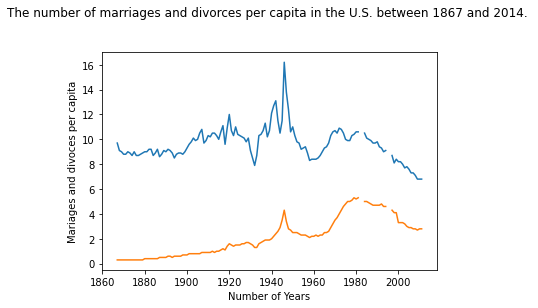

In [263]:
year=marriage.Year.values
marraigee=marriage.Marriages_per_1000.values
divorce=marriage.Divorces_per_1000.values

plt.plot(year,marraigee)
plt.plot(year,divorce)
plt.xlabel("Number of Years")
plt.ylabel("Mariages and divoces per capita")
plt.title("The number of marriages and divorces per capita in the U.S. between 1867 and 2014. \n\n")
plt.show()

## Question 7

#### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

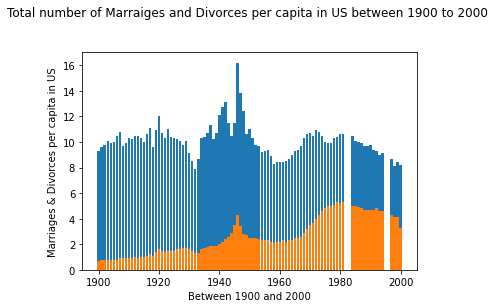

In [248]:
years_1900=marriage.Year>=1900
years_2000=marriage.Year<=2000
Data_1900_2000=marriage[years_1900 & years_2000]
## plt.bar(Data_1900_2000['Marriages_per_1000'],Data_1900_2000['Divorces_per_1000'])
plt.bar(Data_1900_2000['Year'],Data_1900_2000['Marriages_per_1000'])
plt.bar(Data_1900_2000['Year'],Data_1900_2000['Divorces_per_1000'])
plt.title("Total number of Marraiges and Divorces per capita in US between 1900 to 2000 \n\n")
plt.xlabel("Between 1900 and 2000")
plt.ylabel("Marriages & Divorces per capita in US")
plt.show()

## Question 8

#### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!


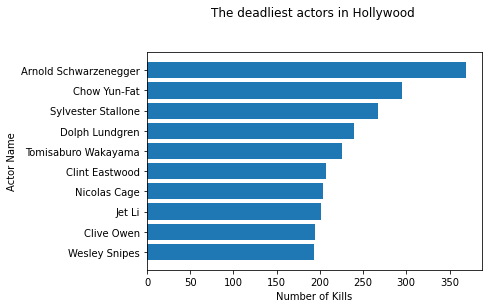

In [251]:
deadliestActorData= pd.read_csv('actor_kill_counts.csv')
deadliestActorData.head()
sortDeadliestActorData=deadliestActorData.sort_values(by='Count',ascending=True)
actor_Names= deadliestActorData.Actor
plt.barh(sortDeadliestActorData['Actor'],sortDeadliestActorData['Count'])
plt.xlabel("Number of Kills")
plt.ylabel("Actor Name")
plt.title("The deadliest actors in Hollywood \n\n ")
plt.show()

## Question 9

#### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

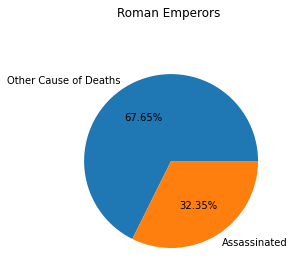

In [252]:
romanData= pd.read_csv('roman-emperor-reigns.csv')
romanData.head()
##assassinated_emperors = romanData[romanData['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
lowerData= romanData.where(romanData.Cause_of_Death=="Assassinated").Cause_of_Death.count()
remaining= romanData.Cause_of_Death.count()-lowerData
label=["Other Cause of Deaths","Assassinated"]
plt.pie([remaining,lowerData],labels=label,autopct='%.2f%%')
plt.title("Roman Emperors \n\n")
##plt.pie(assassinated_emperors)
plt.show()

## Question 10

#### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009

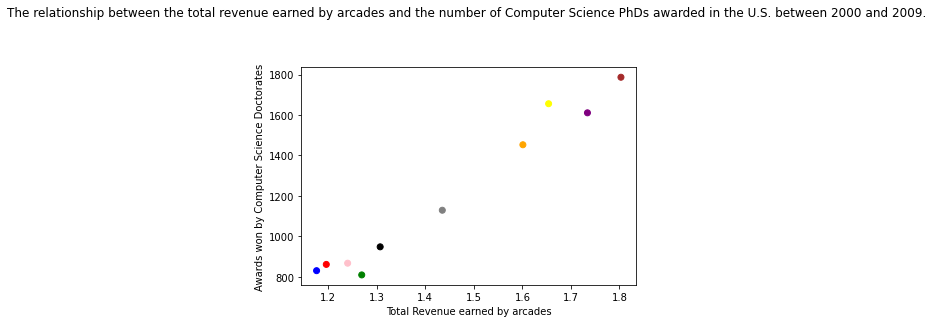

In [261]:
revenueData= pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
Years=revenueData.Year
Arcade= revenueData['Total Arcade Revenue (billions)']
PhD=revenueData['Computer Science Doctorates Awarded (US)']
##plt.scatter(Years,Arcade)
colors=["Red","Blue","Green","Pink","Black","Gray","Orange","Yellow","Brown","Purple"]
plt.scatter(Arcade,PhD,color=colors)
plt.xlabel("Total Revenue earned by arcades")
plt.ylabel("Awards won by Computer Science Doctorates")
plt.title("The relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. \n\n\n")
plt.show()